In [ ]:
import torch
import gym
from gym.wrappers import TimeLimit
import numpy as np
import random
from ddpg import DDPG
import rl_utils

actor_lr = 3e-4
critic_lr = 3e-3
num_episodes = 200
hidden_dim = 64
gamma = 0.98
tau = 0.005  # 软更新参数
buffer_size = 10000 # 最大存储交互次数
minimal_size = 1000 # 开始训练交互次数
batch_size = 64
sigma = 0.01  # 高斯噪声标准差
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(device)

env_name = 'Pendulum-v1'
env = gym.make(env_name, render_mode='rgb_array')
env = TimeLimit(env, max_episode_steps=env.spec.max_episode_steps)  # 限制最大步数为200
random.seed(0)
np.random.seed(0)
env.reset(seed=0)
print(env.spec.max_episode_steps)  # 检查环境的最大步数
torch.manual_seed(0)
replay_buffer = rl_utils.ReplayBuffer(buffer_size)
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0]
action_bound = env.action_space.high[0]  # 动作最大值
agent = DDPG(state_dim, hidden_dim, action_dim, action_bound, sigma, actor_lr, critic_lr, tau, gamma, device)

return_list = rl_utils.train_off_policy_agent(env, agent, num_episodes, replay_buffer, minimal_size, batch_size)

In [ ]:
import torch
import gym
from gym.wrappers import TimeLimit
import numpy as np
import random
from ddpg import DDPG
from Environment import ENV
import rl_utils

actor_lr = 3e-4
critic_lr = 3e-3
num_episodes = 2e4
hidden_dim = 64
gamma = 0.98
tau = 0.005  # 软更新参数
buffer_size = 10000
minimal_size = 1000
batch_size = 64
sigma = 0.01  # 高斯噪声标准差
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(device)

env_name = 'Single-EVCS'
env = ENV()
random.seed(0)
np.random.seed(0)
env.reset(seed=0)
torch.manual_seed(0)
replay_buffer = rl_utils.ReplayBuffer(buffer_size)
state_dim = env.state_dim
action_dim = env.action_dim
action_bound = env.e_max  # 动作最大值
agent = DDPG(state_dim, hidden_dim, action_dim, action_bound, sigma, actor_lr, critic_lr, tau, gamma, device)

return_list = rl_utils.train_off_policy_agent(env, agent, num_episodes, replay_buffer, minimal_size, batch_size)

In [ ]:
import matplotlib.pyplot as plt

episodes_list = list(range(len(return_list)))
plt.plot(episodes_list, return_list)
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title('DDPG on {}'.format(env_name))
plt.show()

mv_return = rl_utils.moving_average(return_list, 9)
plt.plot(episodes_list, mv_return)
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title('DDPG on {}'.format(env_name))
plt.show()

In [ ]:
import torch
from agent import Agent

args= {}
args['is_train'] = True # 是否训练
args['actor_lr'] = 1e-4 # 学习率
args['critic_lr'] = 1e-4
args['num_episodes'] = 2e2  # 训练次数
args['hidden_dim'] = 64
args['gamma'] = 0.98    # 衰减因子
args['tau'] = 0.005  # 软更新参数
args['buffer_size'] = 10000 # 最大存储交互次数
args['minimal_size'] = 1000 # 开始训练交互次数
args['batch_size'] = 64 # 每次训练选取多少样本
args['sigma'] = 0.01  # 高斯噪声标准差
args['device'] = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
project = 'Single-ddpg'
name = 'train6'
args['checkpoint_dir'] = '{}/{}'.format(project, name)

agent1 = Agent(**args)
num_loop = int(2e2)
for i in range(num_loop):
    print('loop: ', i)
    agent1.train()
    agent1.save()

DDPG 训练

In [1]:
import torch
from agent import Agent

args= {}
project = 'Single-ddpg'
name = 'train9'
args['checkpoint_dir'] = '{}/{}'.format(project, name)

agent1 = Agent(**args)
num_loop = int(2e2)
for i in range(num_loop):
    print('loop: ', i)
    agent1.train()
    agent1.save()

TypeError: around() got an unexpected keyword argument 'type'

In [ ]:
import torch
from agent import Agent
%matplotlib inline

args= {}
args['is_train'] = True # 是否训练
args['actor_lr'] = 1e-4 # 学习率
args['critic_lr'] = 1e-4
args['num_episodes'] = 2e2  # 训练次数
args['hidden_dim'] = 64
args['gamma'] = 0.98    # 衰减因子
args['tau'] = 0.005  # 软更新参数
args['buffer_size'] = 10000 # 最大存储交互次数
args['minimal_size'] = 1000 # 开始训练交互次数
args['batch_size'] = 64 # 每次训练选取多少样本
args['sigma'] = 0.01  # 高斯噪声标准差
args['device'] = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
project = 'Single-ddpg'
name = 'train5:abs(socpunish)'
args['checkpoint_dir'] = '{}/{}'.format(project, name)

agent1 = Agent(**args)
agent1.plot_punish(-500, -1)

DDPG 测试

In [2]:
import torch
from agent import Agent

args= {}
args['is_train'] = False
project = 'Single-ddpg'
name = 'test9'
args['checkpoint_dir'] = '{}/{}'.format(project, name)

agent1 = Agent(**args)
num_loop = int(2e2)
for i in range(num_loop):
    print('loop: ', i)
    agent1.test()
    agent1.save()

TypeError: around() got an unexpected keyword argument 'type'

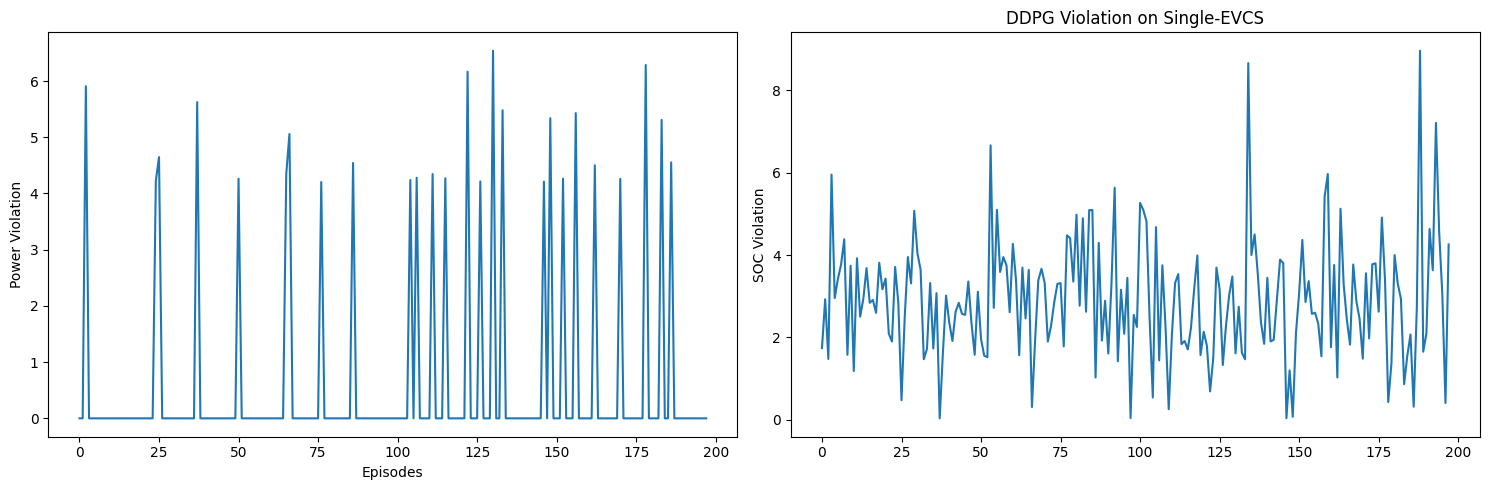

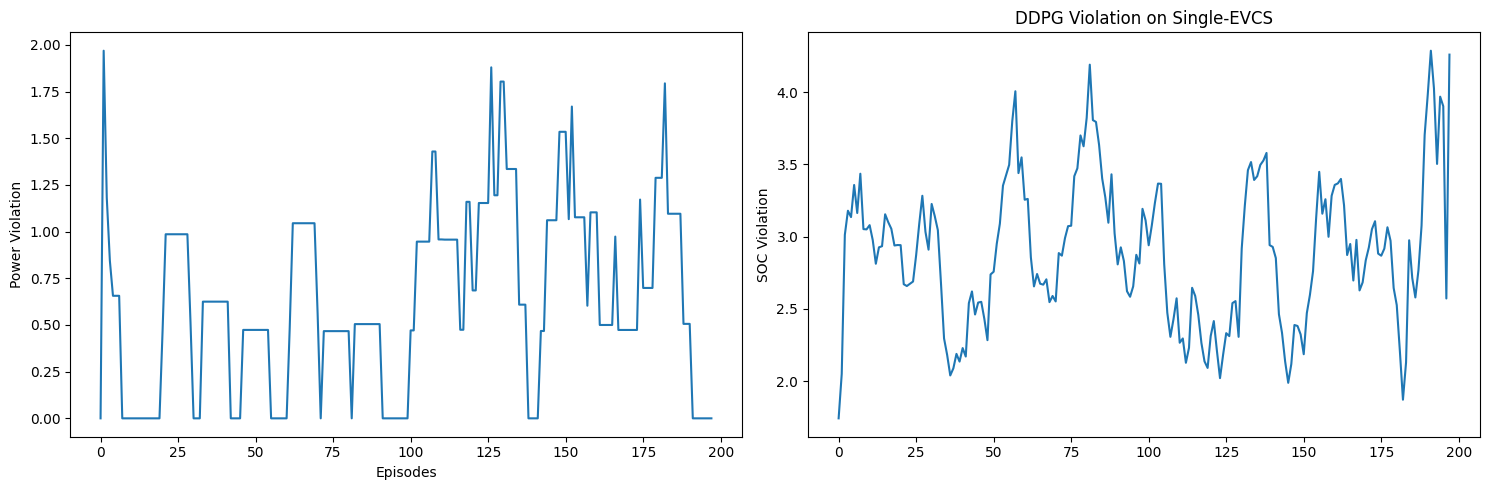

In [2]:
agent1.plot_violation(1, -1)

cuda [load] success.


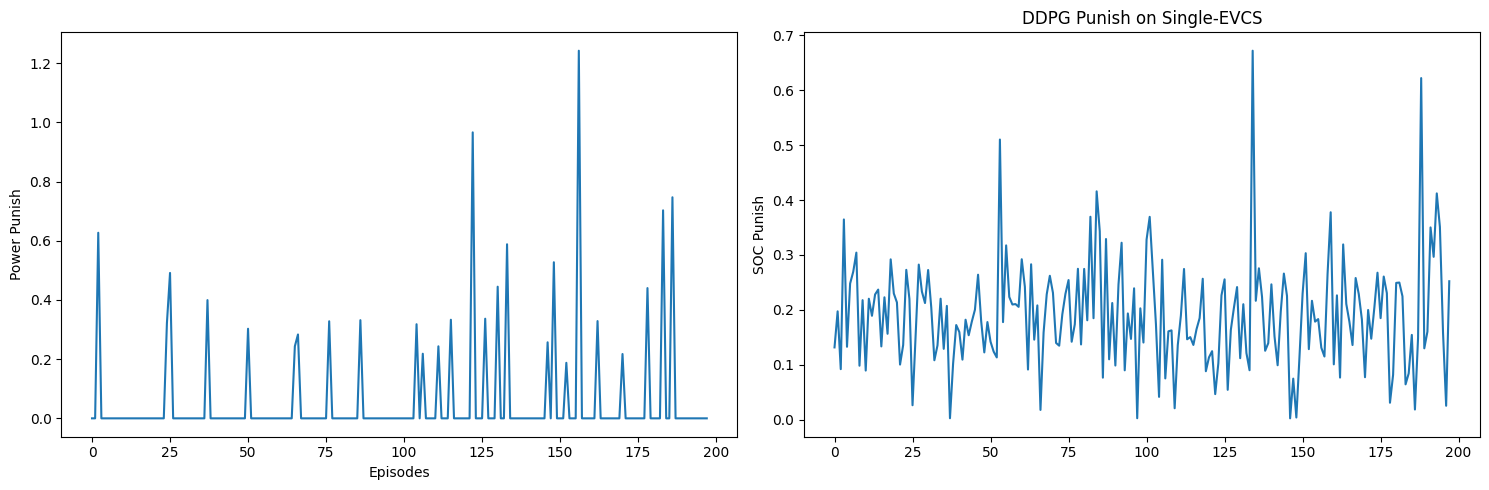

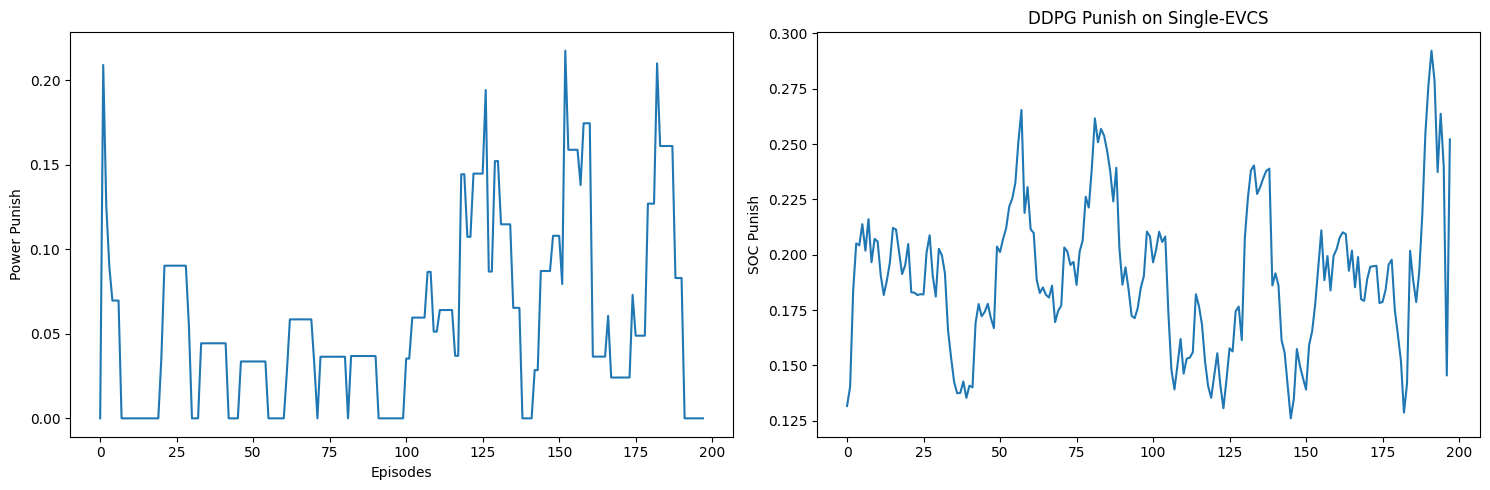

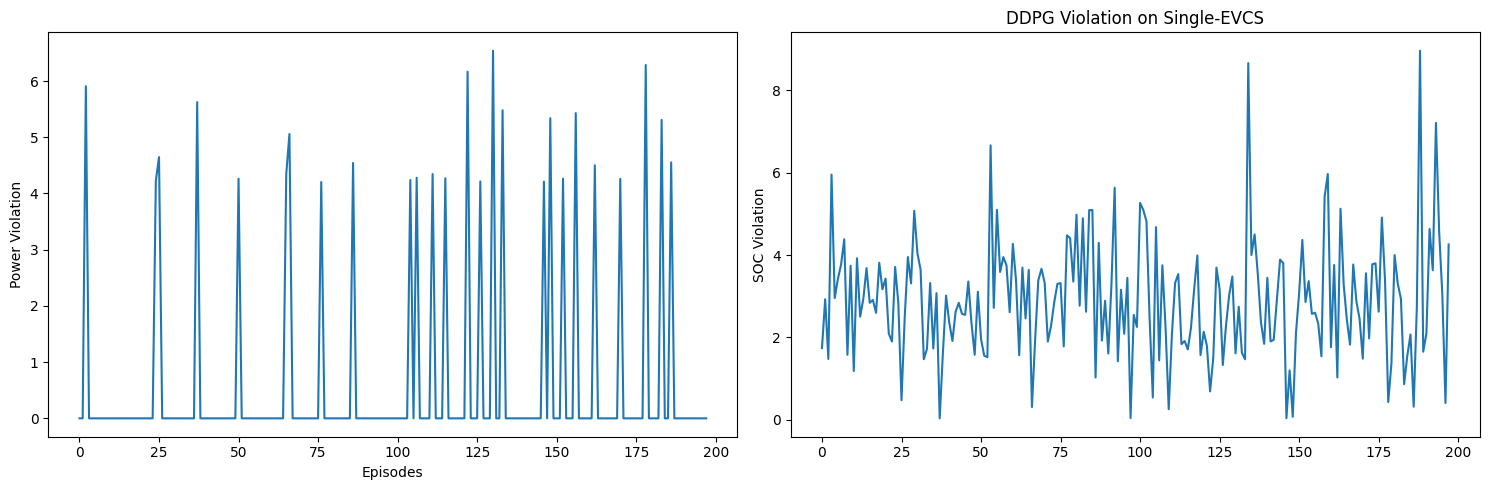

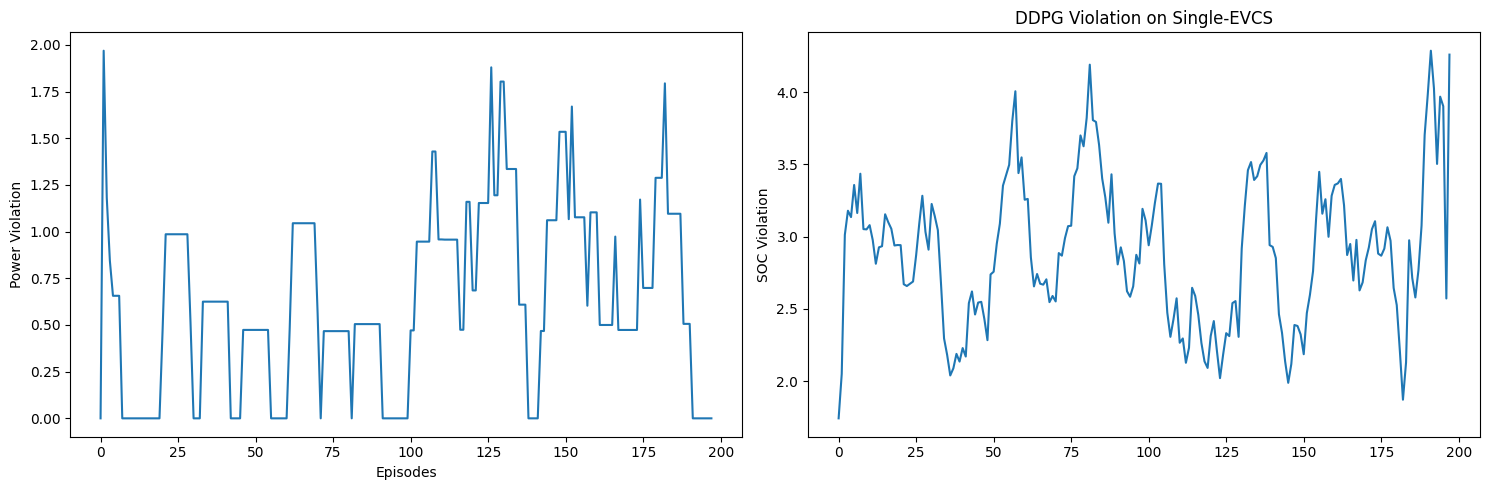

In [1]:
import torch
from agent import Agent

args= {}
args['is_train'] = False
project = 'Single-ddpg'
name = 'test9'
args['checkpoint_dir'] = '{}/{}'.format(project, name)

agent2 = Agent(**args)
agent2.plot_punish(1, -1)
agent2.plot_violation(1, -1)